In [1]:
# Initial imports

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pandas_profiling import ProfileReport


In [2]:
# Application configuration parameters

URL = 'https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/practice-preprofiling-pandas/main/Melbourne_housing_full.csv'
DIST_CATGRY_COLMN_THERSHOLD = 20
STATS_COLUMNS = ['column','distinct', 'missing', 'memory_usage', 'total_values_count', 'actual_count', 'd_type']

In [3]:
df = pd.read_csv(URL)

In [4]:
#Collecting generic information for analysis

columns = df.columns
actual_count = df.shape[0]
total_cells = actual_count*len(columns)
memory_size_MiB = round((df.memory_usage(index=True).sum()/1024)/1024, 1)
missing_cells = df.isnull().sum().sum()
missing_cells_perc = round(missing_cells/(total_cells)*100, 2)
duplicate_rows = df[df.duplicated()]
duplicate_rows_len = len(duplicate_rows)
duplicate_rows_prec = duplicate_rows_len/actual_count
memory_size_Bb = round(memory_size_MiB/actual_count*1024*1024, 1)

# Dataset statistics

In [125]:
print(f"""
Number of variables\t: {len(columns)}
Number of observations\t: {actual_count}
Missing cells\t: {missing_cells}
Missing cells (%)\t: {missing_cells_perc}
Duplicate rows\t: {duplicate_rows_len}
Duplicate rows (%)\t: {duplicate_rows_prec}
Total size in memory\t: {memory_size_MiB}
Average record size in memory\t: {memory_size_Bb}
""")


Number of variables	: 21
Number of observations	: 34857
Missing cells	: 100975
Missing cells (%)	: 13.79
Duplicate rows	: 1
Duplicate rows (%)	: 2.8688642166566258e-05
Total size in memory	: 5.6
Average record size in memory	: 168.5



# Duplicate rows...

In [7]:
duplicate_rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [126]:
#Finding variable stats
#Distinct, Missing, Memory, Dtype
# 272.4 
count = 0
df_varaible_stats = pd.DataFrame(data = [], columns = STATS_COLUMNS)
for column in columns:
    distinct = df[column].nunique()
    missing = df[column].isnull().sum()
    memory = round(df[column].memory_usage()/1024, 1)
    total_values_count = df[column].count()
    d_type = df[column].dtype
    df_varaible_stats.loc[count] = [column, distinct, missing, memory, total_values_count, actual_count, d_type]
    count += 1
df_varaible_stats = df_varaible_stats.convert_dtypes(convert_floating=True)

In [127]:

df_varaible_stats['distinct %'] = round(df_varaible_stats['distinct']/actual_count, 4)*100
df_varaible_stats

df_varaible_stats['missing %'] = round(df_varaible_stats['missing']/actual_count, 4)*100
df_varaible_stats

,column,distinct,missing,memory_usage,total_values_count,actual_count,d_type,distinct %,missing %
0,Suburb,351,0,272.4,34857,34857,object,1.01,0.0
1,Address,34009,0,272.4,34857,34857,object,97.57,0.0
2,Rooms,12,0,272.4,34857,34857,int64,0.03,0.0
3,Type,3,0,272.4,34857,34857,object,0.01,0.0
4,Price,2871,7610,272.4,27247,34857,float64,8.24,21.83
5,Method,9,0,272.4,34857,34857,object,0.03,0.0
6,SellerG,388,0,272.4,34857,34857,object,1.11,0.0
7,Date,78,0,272.4,34857,34857,object,0.22,0.0
8,Distance,215,1,272.4,34856,34857,float64,0.62,0.0
9,Postcode,211,1,272.4,34856,34857,float64,0.61,0.0


In [26]:
#Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [120]:
#Frequency of characters

count = 0

for column in columns:
    print(df.groupby([column], dropna=True)[column]\
          .count()\
          .sort_values(ascending=False)\
          .head(5)\
          .to_markdown())
    print()

| Suburb         |   Suburb |
|:---------------|---------:|
| Reservoir      |      844 |
| Bentleigh East |      583 |
| Richmond       |      552 |
| Glen Iris      |      491 |
| Preston        |      485 |

| Address          |   Address |
|:-----------------|----------:|
| 5 Charles St     |         6 |
| 25 William St    |         4 |
| 3 Donald St      |         3 |
| 16 Smith St      |         3 |
| 1/1 Clarendon St |         3 |

|   Rooms |   Rooms |
|--------:|--------:|
|       3 |   15084 |
|       2 |    8332 |
|       4 |    7956 |
|       5 |    1737 |
|       1 |    1479 |

| Type   |   Type |
|:-------|-------:|
| h      |  23980 |
| u      |   7297 |
| t      |   3580 |

|        Price |   Price |
|-------------:|--------:|
| 600000       |     235 |
|      1.1e+06 |     235 |
| 650000       |     219 |
| 800000       |     217 |
|      1.3e+06 |     210 |

| Method   |   Method |
|:---------|---------:|
| S        |    19744 |
| SP       |     5095 |
| PI       |   

In [111]:
print(df.groupby(['Suburb'], dropna=True)['Suburb']\
.count()\
.sort_values(ascending=False)\
.head(5).to_markdown())

| Suburb         |   Suburb |
|:---------------|---------:|
| Reservoir      |      844 |
| Bentleigh East |      583 |
| Richmond       |      552 |
| Glen Iris      |      491 |
| Preston        |      485 |


# Correlation

In [10]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


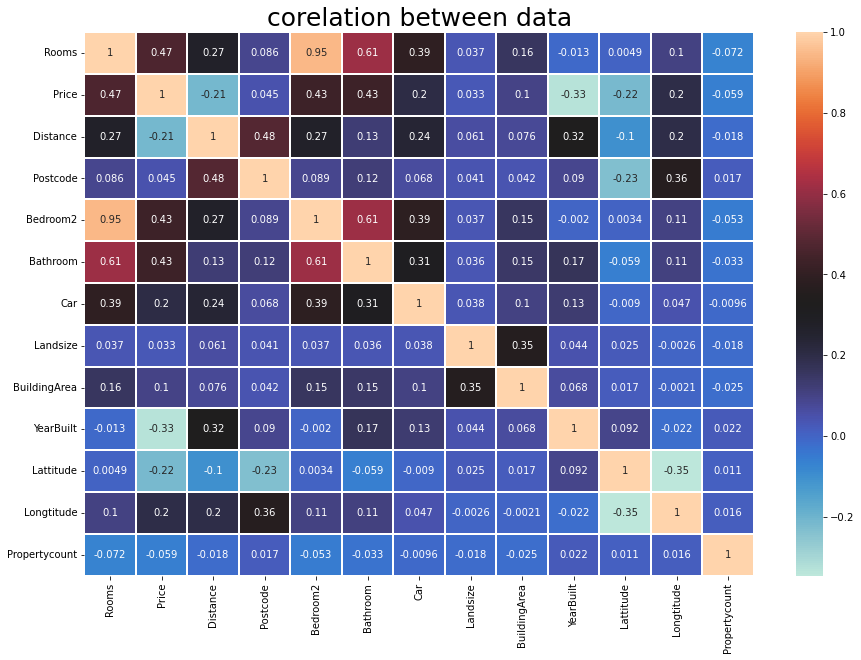

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='icefire', linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("corelation between data", color='black', size=25)
plt.show()

In [9]:
df.cov()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,0.940770,2.849444e+05,1.787864,9.082629e+00,0.891230,0.425279,0.382485,1.221813e+02,6.103778e+01,-4.694370e-01,0.000424,0.011964,-3.078539e+02
Price,284944.435126,4.114801e+11,-920363.529407,3.204615e+06,268308.351521,196627.913784,131425.466129,8.040162e+07,3.064955e+07,-8.225848e+06,-12899.793808,15593.959965,-1.700760e+08
Distance,1.787864,-9.203635e+05,46.089061,3.564320e+02,1.820819,0.629642,1.678381,1.382438e+03,2.174114e+02,8.375633e+01,-0.062468,0.166393,-5.453381e+02
Postcode,9.082629,3.204615e+06,356.431993,1.188621e+04,9.832646,9.765642,7.731578,1.478868e+04,2.038161e+03,3.864271e+02,-2.337327,4.887005,8.259377e+03
Bedroom2,0.891230,2.683084e+05,1.820819,9.832646e+00,0.961752,0.436677,0.385806,1.239541e+02,6.031971e+01,-7.614138e-02,0.000305,0.012523,-2.274236e+02
Bathroom,0.425279,1.966279e+05,0.629642,9.765642e+00,0.436677,0.524483,0.225790,9.002842e+01,4.368815e+01,4.608070e+00,-0.003873,0.009282,-1.033393e+02
Car,0.382485,1.314255e+05,1.678381,7.731578e+00,0.385806,0.225790,1.021658,1.295039e+02,4.256199e+01,4.751541e+00,-0.000829,0.005748,-4.223906e+01
Landsize,122.181295,8.040162e+07,1382.437825,1.478868e+04,123.954130,90.028421,129.503912,1.155213e+07,1.711919e+05,1.758897e+03,7.542143,-1.025878,-2.675078e+05
BuildingArea,61.037782,3.064955e+07,217.411383,2.038161e+03,60.319708,43.688148,42.561988,1.711919e+05,1.610153e+05,2.283379e+02,0.635043,-0.105336,-4.245582e+04
YearBuilt,-0.469437,-8.225848e+06,83.756327,3.864271e+02,-0.076141,4.608070,4.751541,1.758897e+03,2.283379e+02,1.393393e+03,0.308261,-0.099138,3.600521e+03


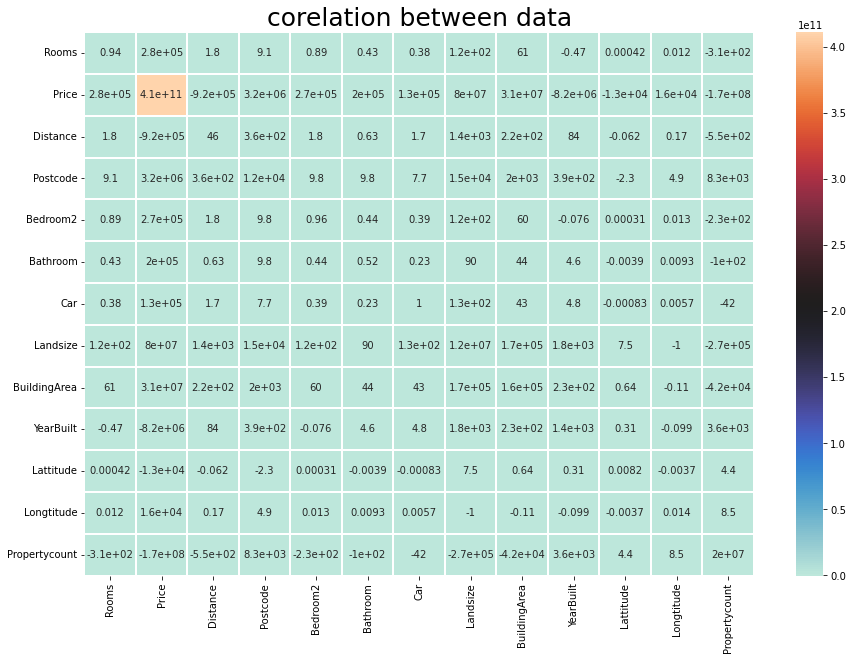

In [17]:
sns.heatmap(df.cov(), annot=True, cmap='icefire', linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("corelation between data", color='black', size=25)
plt.show()

# Missing values

<AxesSubplot:xlabel='column', ylabel='total_values_count'>

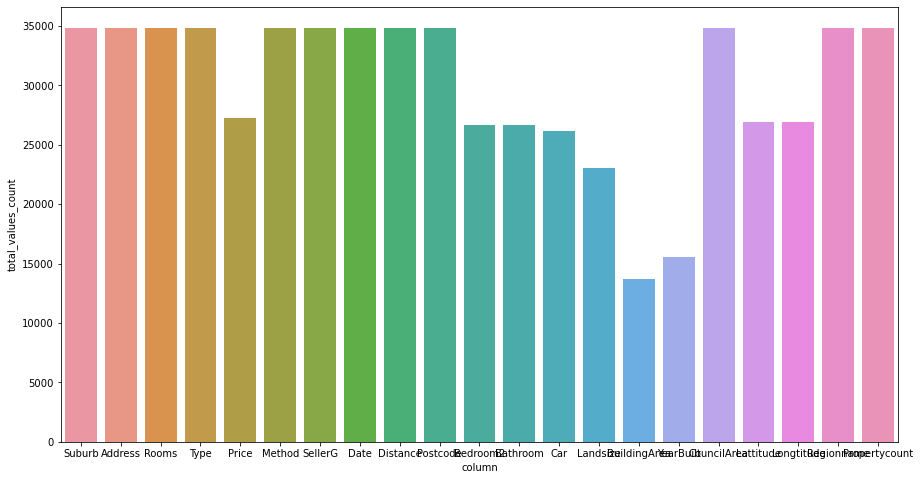

In [16]:
#Plotting graph
a4_dims = (15, 8)
_, ax = plt.subplots(figsize=a4_dims)

sns.barplot(y='total_values_count', x='column', data=df_varaible_stats, ax=ax)

<h1>Data Sampling</h1>

In [9]:
#Sample top rows

df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [11]:
#Sample bottom rows

df.tail(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34848,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,24/02/2018,25.5,3750.0,...,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,24/02/2018,25.5,3750.0,...,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0
